In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
# Y is sales (Predict)
# X is independent variable i.e sum of TV, radio, newspaper

df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<Axes: xlabel='total_spend', ylabel='sales'>

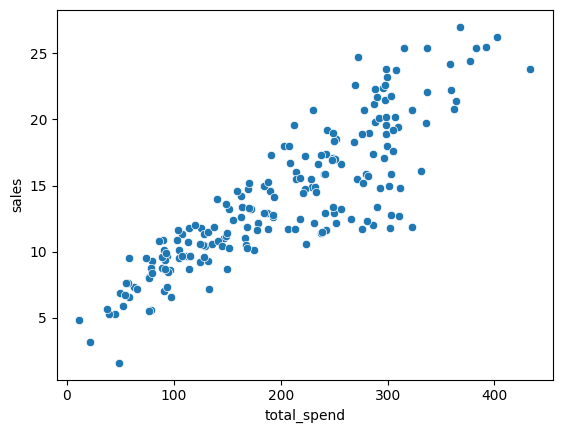

In [5]:
sns.scatterplot(data=df, x='total_spend', y='sales')

<Axes: xlabel='total_spend', ylabel='sales'>

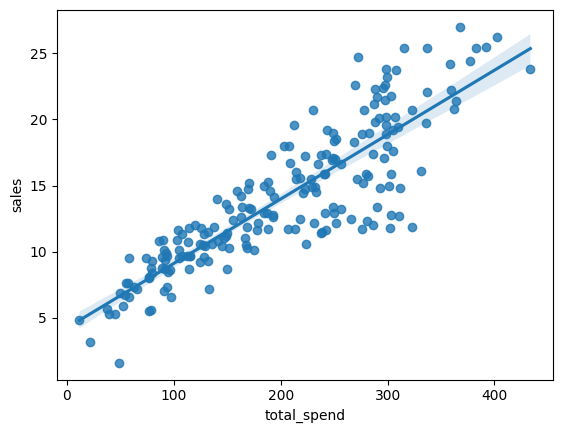

In [6]:
sns.regplot(data=df, x='total_spend', y='sales')

In [7]:
# We Know Linear Regression formula  Y = mX + b
# m = slope and b = intercept

np.polyfit(df['total_spend'], df['sales'], deg=1)

array([0.04868788, 4.24302822])

In [8]:
# Now m = 0.04868788 and b = 4.24302822

m = 0.04868788 
b = 4.24302822

potential_spend = np.linspace(0, 500, 50)   # X-axis points

potential_sale = m * potential_spend + b

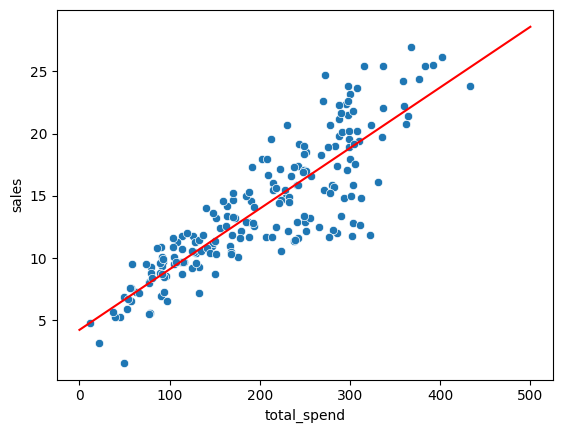

In [9]:
sns.scatterplot(data=df, x='total_spend', y='sales')
plt.plot(potential_spend, potential_sale, color='red')

In [10]:
# Predict future sales if Spend is 350

def simple_linear_reg(total_spend):
    potential_sale = m * total_spend + b
    return potential_sale

spend = 350

simple_linear_reg(350)

21.28378622

In [11]:
# Now let's try deg=3 and check

np.polyfit(df['total_spend'], df['sales'], 3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [12]:
# What this means is Y = m1 * X^^3 + m2 * X^^2 + m3 * X + b
def modified_simple_linear_reg(spend):
    m1 = 3.07615033e-07
    m2 = -1.89392449e-04
    m3 = 8.20886302e-02
    b = 2.70495053e+00

    pot_sale = m1 * spend**3 + m2 * spend**2 + m3 * spend**1 + b

    return pot_sale



In [13]:
pot_spend = np.linspace(0, 500, 100)

pot_sale = modified_simple_linear_reg(pot_spend)

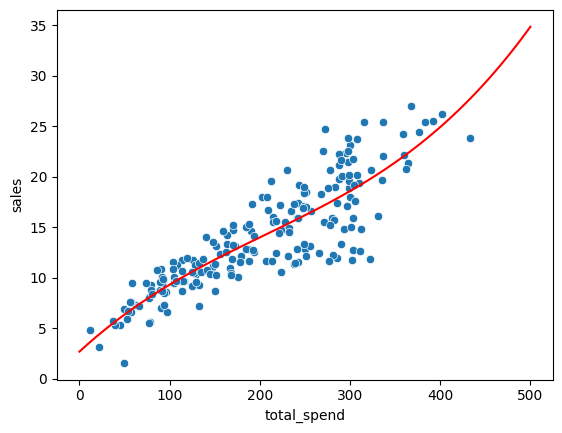

In [14]:
sns.scatterplot(data=df, x='total_spend', y='sales')
plt.plot(pot_spend, pot_sale, color='red')

In [15]:
# Now let's predict sales if total_spend is 350

modified_simple_linear_reg(350)

21.424390637375

In [16]:
simple_linear_reg(350)

21.28378622

In [17]:
pip install scikit-learn


[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.4_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import scikit-learn as sklearn

In [19]:
df = pd.read_csv("Advertising.csv")

In [20]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


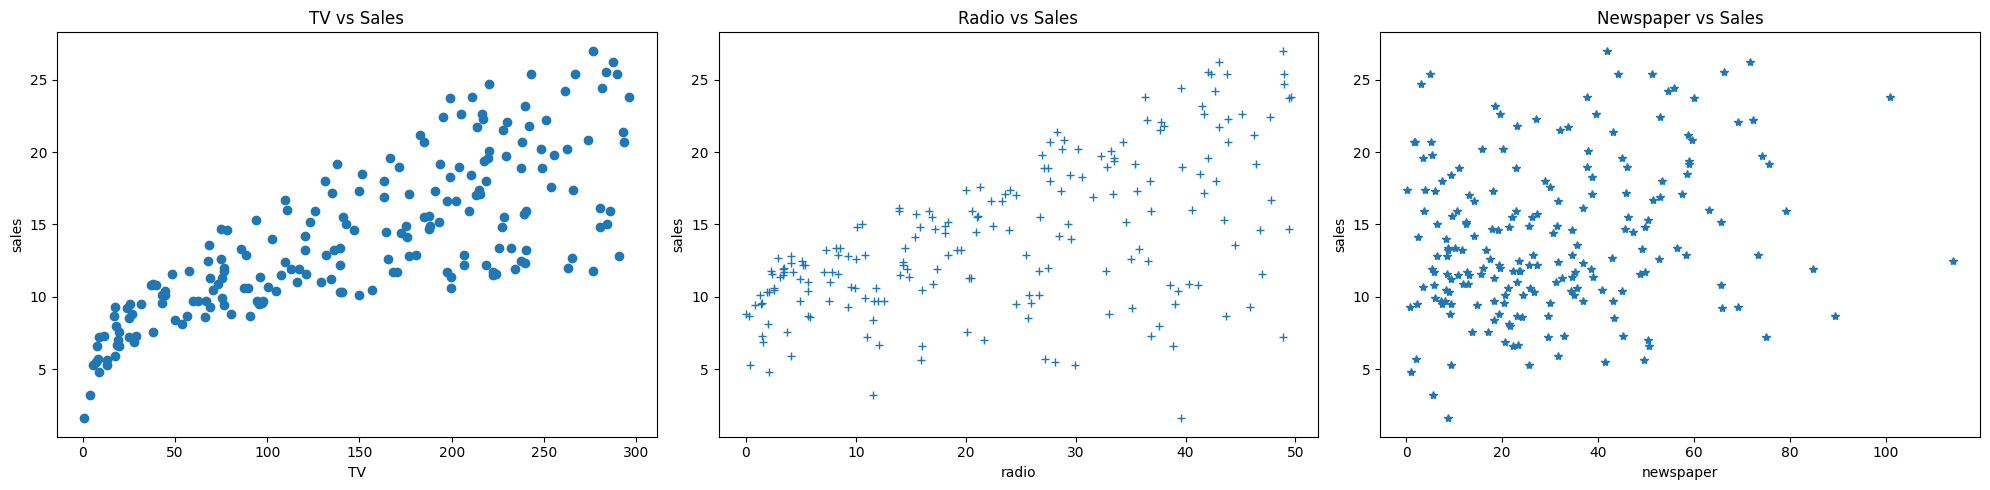

In [21]:
figure, axes = plt.subplots(1,3,figsize=(20,5))

axes[0].plot(df['TV'],df['sales'], 'o')
axes[0].set_xlabel('TV')
axes[0].set_ylabel('sales')
axes[0].set_title('TV vs Sales')

axes[1].plot(df['radio'], df['sales'], '+')
axes[1].set_xlabel('radio')
axes[1].set_ylabel('sales')
axes[1].set_title('Radio vs Sales')

axes[2].plot(df['newspaper'], df['sales'], '*')
axes[2].set_xlabel('newspaper')
axes[2].set_ylabel('sales')
axes[2].set_title('Newspaper vs Sales')

plt.tight_layout()

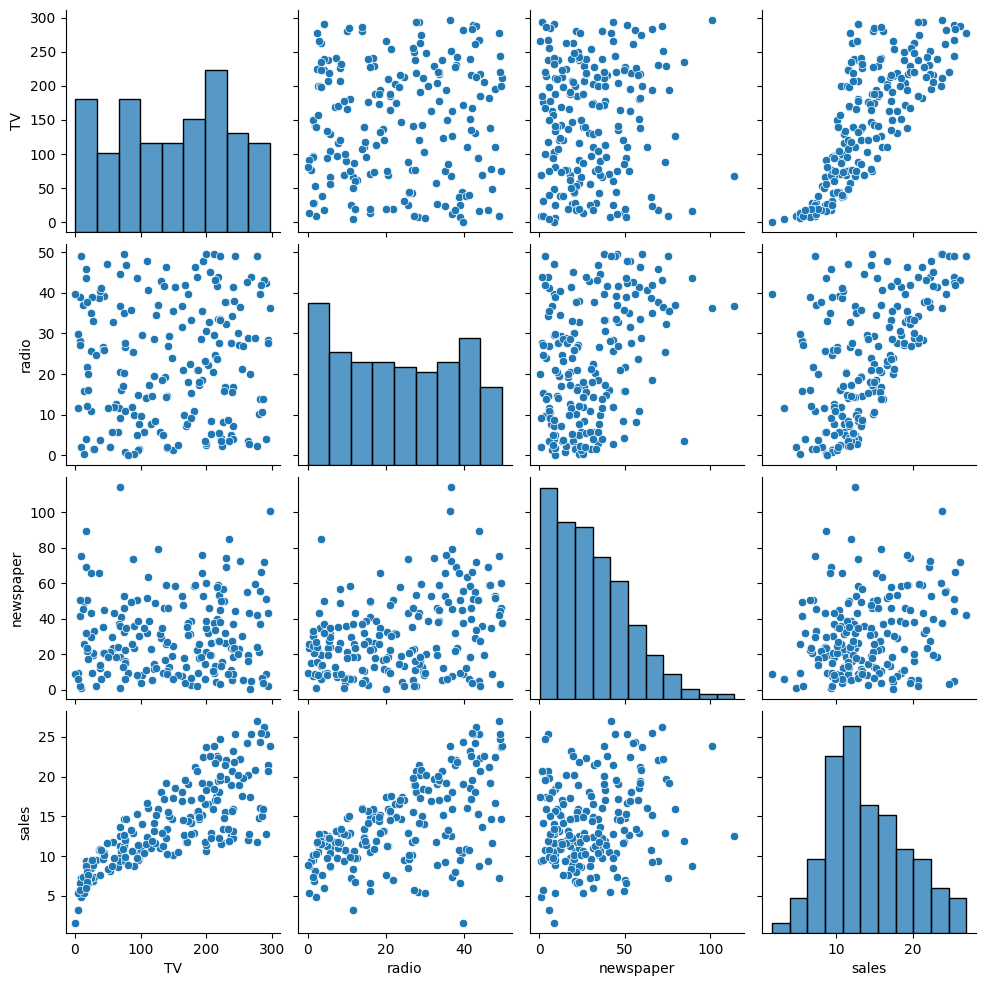

In [22]:
sns.pairplot(df)

In [23]:
df.shape

(200, 4)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [26]:
X = df.drop('sales', axis=1)

In [27]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [28]:
y = df['sales']

In [29]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
len(X_test)

66

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression()

In [34]:
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [35]:
predicted_values = model.predict(X_test)

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [86]:
MAE_SLR = mean_absolute_error(y_test, predicted_values)

In [38]:
np.mean(df['sales'])

np.float64(14.0225)

In [84]:
MSE_SLR = mean_squared_error(y_test, predicted_values)

In [85]:
RMSE_SLR = root_mean_squared_error(y_test, predicted_values)

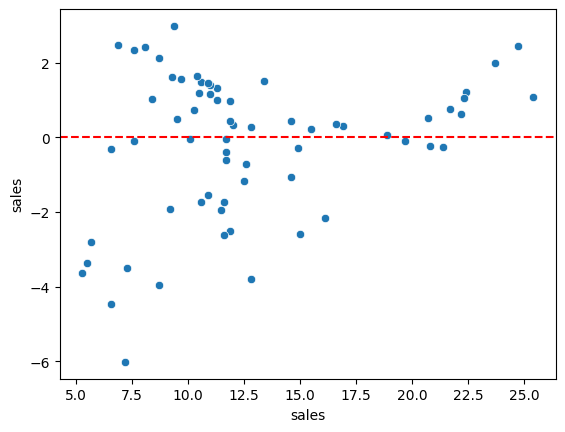

In [41]:
# Residual plot

residual = y_test - predicted_values

sns.scatterplot(x=y_test, y=residual)
plt.axhline(y=0, color='red', ls='--')

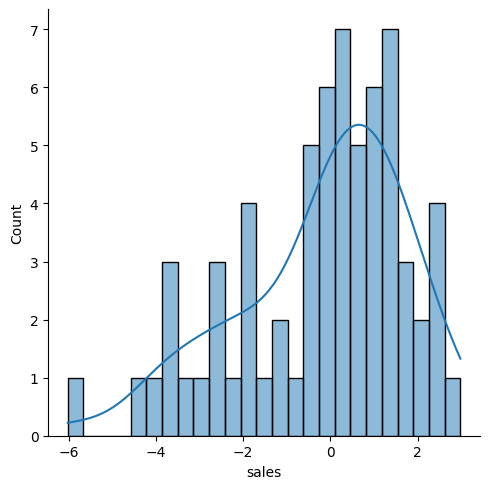

In [42]:
sns.displot(residual, bins=25, kde=True)

In [43]:
final_model = LinearRegression()

In [44]:
final_model.fit(X, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [45]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [46]:
y_hat = final_model.predict(X)

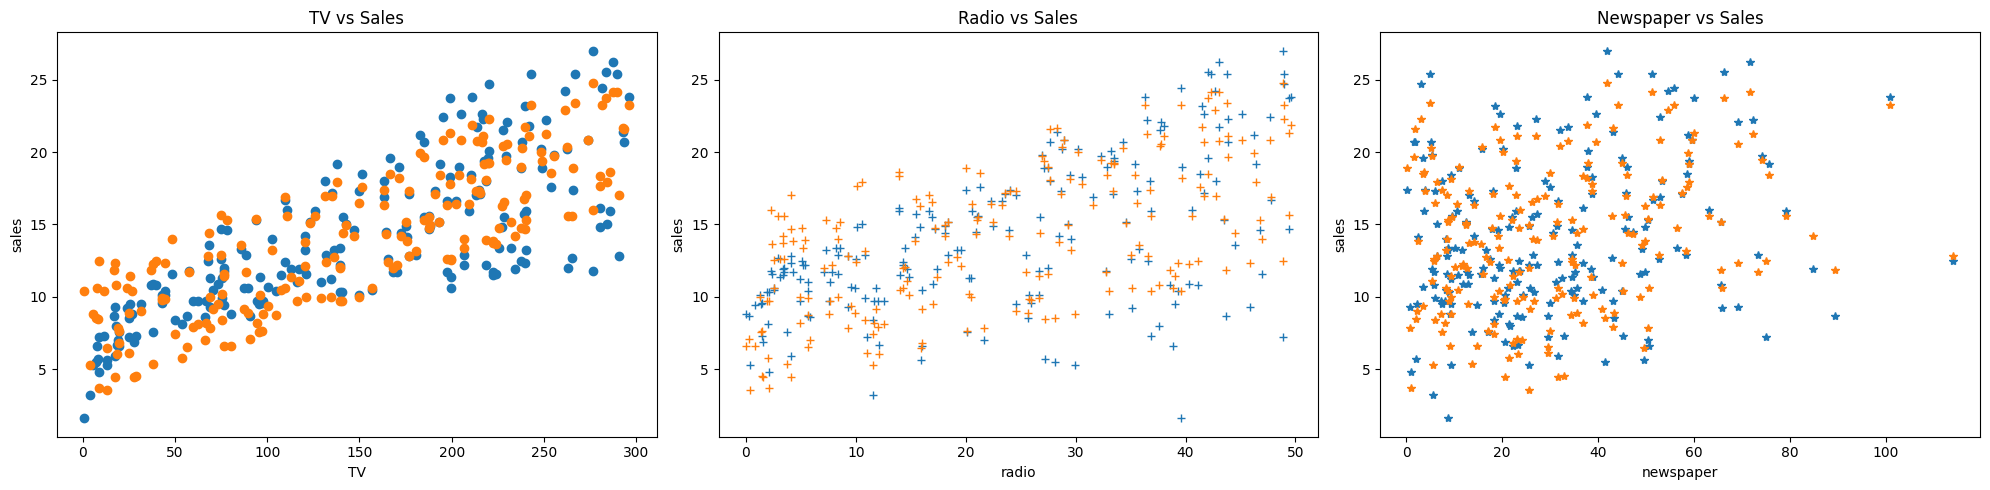

In [47]:
figure, axes = plt.subplots(1,3,figsize=(20,5))

axes[0].plot(df['TV'],df['sales'], 'o')
axes[0].plot(df['TV'],y_hat, 'o')
axes[0].set_xlabel('TV')
axes[0].set_ylabel('sales')
axes[0].set_title('TV vs Sales')

axes[1].plot(df['radio'], df['sales'], '+')
axes[1].plot(df['radio'], y_hat, '+')
axes[1].set_xlabel('radio')
axes[1].set_ylabel('sales')
axes[1].set_title('Radio vs Sales')

axes[2].plot(df['newspaper'], df['sales'], '*')
axes[2].plot(df['newspaper'], y_hat, '*')
axes[2].set_xlabel('newspaper')
axes[2].set_ylabel('sales')
axes[2].set_title('Newspaper vs Sales')

plt.tight_layout()

In [48]:
from joblib import dump, load

In [49]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [50]:
load_model = load('final_sales_model.joblib')

In [51]:
load_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [52]:


X.shape

(200, 3)

In [53]:
# Sample data campaign
# If we spend 149 units on TV, 22 units on Radio, 12 units on Newspaper

campaign = [[149, 22, 12]]

In [54]:
load_model.predict(campaign)

/opt/homebrew/Cellar/jupyterlab/4.3.4_1/libexec/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

In [55]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [56]:
from sklearn.preprocessing import PolynomialFeatures

In [57]:
polynomial_features = PolynomialFeatures(2, include_bias=False)

In [60]:
polynomial_features.fit(X)

,"degree degree: int or tuple (min_degree, max_degree), default=2If a single int is given, it specifies the maximal degree of thepolynomial features. If a tuple `(min_degree, max_degree)` is passed,then `min_degree` is the minimum and `max_degree` is the maximumpolynomial degree of the generated features. Note that `min_degree=0`and `min_degree=1` are equivalent as outputting the degree zero term isdetermined by `include_bias`.",2
,"interaction_only interaction_only: bool, default=FalseIf `True`, only interaction features are produced: features that areproducts of at most `degree` *distinct* input features, i.e. terms withpower of 2 or higher of the same input feature are excluded:- included: `x[0]`, `x[1]`, `x[0] * x[1]`, etc.- excluded: `x[0] ** 2`, `x[0] ** 2 * x[1]`, etc.",False
,"include_bias include_bias: bool, default=TrueIf `True` (default), then include a bias column, the feature in whichall polynomial powers are zero (i.e. a column of ones - acts as anintercept term in a linear model).",False
,"order order: {'C', 'F'}, default='C'Order of output array in the dense case. `'F'` order is faster tocompute, but may slow down subsequent estimators... versionadded:: 0.21",'C'


In [68]:
poly_features = polynomial_features.transform(X)

In [66]:
polynomial_features.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]],
      shape=(200, 9))

In [69]:
poly_features.shape

(200, 9)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=42)

In [73]:
poly_model = LinearRegression()

In [74]:
poly_model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [77]:
poly_predict = poly_model.predict(X_test)

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [78]:
MAE = mean_absolute_error(y_test, poly_predict)

In [80]:
MSE = mean_squared_error(y_test, poly_predict)

In [81]:
RMSE = root_mean_squared_error(y_test, poly_predict)

In [89]:
print(f"""
Initial Linear Regression Model \n
*** Results *** \n
MAE: {MAE_SLR}\n
MSE: {MSE_SLR}\n
RMSE: {RMSE_SLR}\n

Polynomial Features Linear Regression Model \n
*** Results *** \n
MAE: {MAE}\n
MSE: {MSE}\n
RMSE: {RMSE}\n
\n
Improvement\n
MAE: {MAE-MAE_SLR}\n
MSE: {MSE-MSE_SLR}\n
RMSE: {RMSE-RMSE_SLR}\n
""")


Initial Linear Regression Model 

*** Results *** 

MAE: 1.493775002472897

MSE: 3.727928330681509

RMSE: 1.93078438223472


Polynomial Features Linear Regression Model 

*** Results *** 

MAE: 0.5475837919149601

MSE: 0.4603062493888214

RMSE: 0.6784587307926853



Improvement

MAE: -0.946191210557937

MSE: -3.267622081292688

RMSE: -1.2523256514420347




In [92]:
# Let's explore higher degree of polynomial on training and test data
train_rmse_error = []
test_rmse_error = []

for d in range(1, 10):
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=42)

    model = LinearRegression()

    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse = root_mean_squared_error(y_train, train_pred)
    test_rmse = root_mean_squared_error(y_test, test_pred)

    train_rmse_error.append(train_rmse)
    test_rmse_error.append(test_rmse)
    



In [93]:
train_rmse_error

[1.5526939990087725,
 0.6057702019226605,
 0.4756847293184342,
 0.3742987908933739,
 0.24108758011795944,
 0.22044271666433485,
 0.21968487275881146,
 0.2807602204843705,
 0.5635860373221879]

In [94]:
test_rmse_error

[1.9307843822347195,
 0.6784587307926853,
 0.5148267621808731,
 1.275058953464642,
 6.410720048796841,
 20.222230815511082,
 104.66577513428562,
 4700.5707964220765,
 6350.0371659234825]

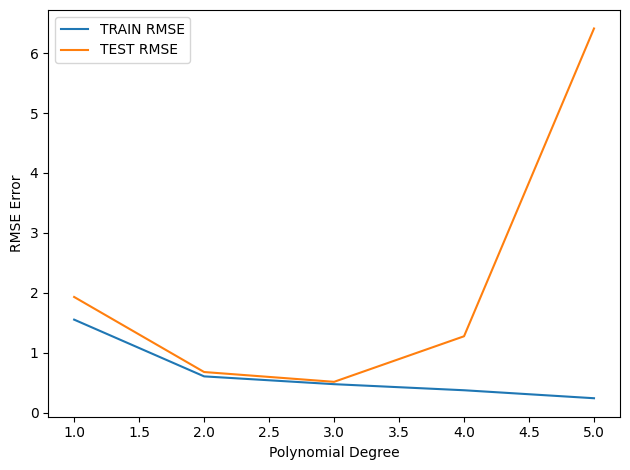

In [96]:
plt.plot(range(1,6), train_rmse_error[:5], label = 'TRAIN RMSE')
plt.plot(range(1,6), test_rmse_error[:5], label = 'TEST RMSE')
plt.legend()
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE Error')

plt.tight_layout()

In [97]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [98]:
final_model = LinearRegression()

In [100]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [111]:
y_hat2 = final_model.predict(full_converted_X)

In [101]:
from joblib import dump, load

In [103]:
dump(final_model, 'final_poly_model.joblib')


['final_poly_model.joblib']

In [104]:
dump(final_poly_converter, 'final_poly_converter.joblib')

['final_poly_converter.joblib']

In [107]:
# Let's test on real world data
loaded_converter = load('final_poly_converter.joblib')
loaded_model = load('final_poly_model.joblib')

def lr_model(data):
    converter_data = loaded_converter.fit_transform(data)
    final_results = loaded_model.predict(converter_data)

    return final_results

campaign = [[149, 22, 12]]
    

In [108]:
lr_model(campaign)

array([14.64501014])

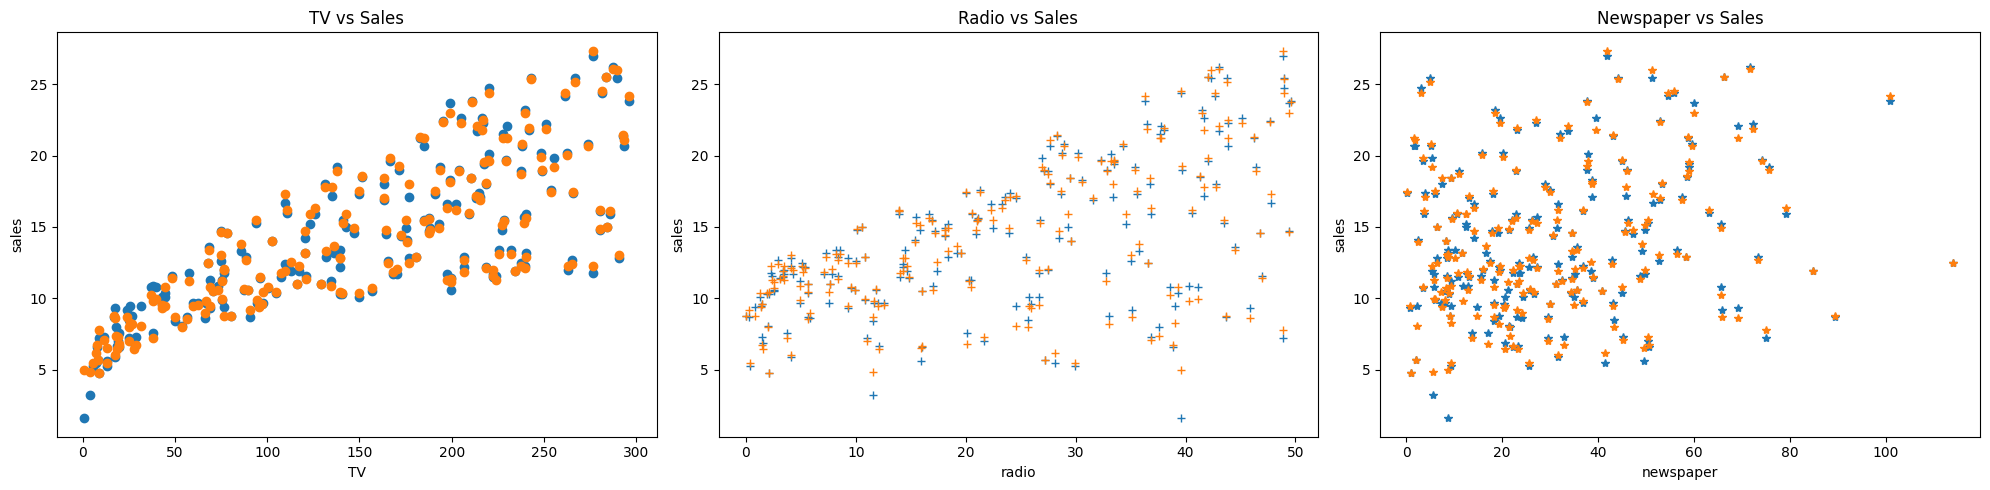

In [112]:
figure, axes = plt.subplots(1,3,figsize=(20,5))

axes[0].plot(df['TV'],df['sales'], 'o')
axes[0].plot(df['TV'],y_hat2, 'o')
axes[0].set_xlabel('TV')
axes[0].set_ylabel('sales')
axes[0].set_title('TV vs Sales')

axes[1].plot(df['radio'], df['sales'], '+')
axes[1].plot(df['radio'], y_hat2, '+')
axes[1].set_xlabel('radio')
axes[1].set_ylabel('sales')
axes[1].set_title('Radio vs Sales')

axes[2].plot(df['newspaper'], df['sales'], '*')
axes[2].plot(df['newspaper'], y_hat2, '*')
axes[2].set_xlabel('newspaper')
axes[2].set_ylabel('sales')
axes[2].set_title('Newspaper vs Sales')

plt.tight_layout()

# L2 Regression i.e Ridge Regression with Feature Scaling and Cross Validation


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop("sales", axis = 1)

In [5]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [6]:
y = df['sales']

In [7]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
polynomial_converter = PolynomialFeatures(degree=3, include_bias=False)

In [10]:
poly_features = polynomial_converter.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [15]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [16]:
from sklearn.linear_model import Ridge

In [17]:
ridge_model = Ridge(alpha=10)

In [18]:
ridge_model.fit(scaled_X_train, y_train)

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",10
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


In [19]:
test_predictions = ridge_model.predict(scaled_X_test)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [21]:
MAE_ridge = mean_absolute_error(y_test, test_predictions)


In [22]:
MSE_ridge = mean_squared_error(y_test, test_predictions)

In [23]:
RMSE_ridge = root_mean_squared_error(y_test, test_predictions)

In [24]:
print(f"""
L2: Ridge regression Results\n
MAE: {MAE_ridge}\n
MSE: {MSE_ridge}\n
RSME: {RMSE_ridge}\n
""")


L2: Ridge regression Results

MAE: 0.5774404204714181

MSE: 0.800378307152842

RSME: 0.8946386461319688




In [25]:
# Cross Validation


In [28]:
from sklearn.linear_model import RidgeCV

In [29]:
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0))

In [30]:
ridge_cv_model.fit(scaled_X_train, y_train)

,"alphas alphas: array-like of shape (n_alphas,), default=(0.1, 1.0, 10.0)Array of alpha values to try.Regularization strength; must be a positive float. Regularizationimproves the conditioning of the problem and reduces the variance ofthe estimates. Larger values specify stronger regularization.Alpha corresponds to ``1 / (2C)`` in other linear models such as:class:`~sklearn.linear_model.LogisticRegression` or:class:`~sklearn.svm.LinearSVC`.If using Leave-One-Out cross-validation, alphas must be strictly positive.","(0.1, ...)"
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto false, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"scoring scoring: str, callable, default=NoneThe scoring method to use for cross-validation. Options:- str: see :ref:`scoring_string_names` for options.- callable: a scorer callable object (e.g., function) with signature ``scorer(estimator, X, y)``. See :ref:`scoring_callable` for details.- `None`: negative :ref:`mean squared error ` if cv is None (i.e. when using leave-one-out cross-validation), or :ref:`coefficient of determination ` (:math:`R^2`) otherwise.",None
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the efficient Leave-One-Out cross-validation- integer, to specify the number of folds.- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if ``y`` is binary or multiclass,:class:`~sklearn.model_selection.StratifiedKFold` is used, else,:class:`~sklearn.model_selection.KFold` is used.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here.",None
,"gcv_mode gcv_mode: {'auto', 'svd', 'eigen'}, default='auto'Flag indicating which strategy to use when performingLeave-One-Out Cross-Validation. Options are:: 'auto' : use 'svd' if n_samples > n_features, otherwise use 'eigen' 'svd' : force use of singular value decomposition of X when X is dense, eigenvalue decomposition of X^T.X when X is sparse. 'eigen' : force computation via eigendecomposition of X.X^TThe 'auto' mode is the default and is intended to pick the cheaperoption of the two depending on the shape of the training data.",None
,"store_cv_results store_cv_results: bool, default=FalseFlag indicating if the cross-validation values corresponding toeach alpha should be stored in the ``cv_results_`` attribute (seebelow). This flag is only compatible with ``cv=None`` (i.e. usingLeave-One-Out Cross-Validation)... versionchanged:: 1.5 Parameter name changed from `store_cv_values` to `store_cv_results`.",False
,"alpha_per_target alpha_per_target: bool, default=FalseFlag indicating whether to optimize the alpha value (picked from the`alphas` parameter list) for each target separately (for multi-outputsettings: multiple prediction targets). When set to `True`, afterfitting, the `alpha_` attribute will contain a value for each target.When set to `False`, a single alpha is used for all targets... versionadded:: 0.24",False


In [31]:
test_cv_predictions = ridge_cv_model.predict(scaled_X_test)

In [32]:
MAE_cv_ridge = mean_absolute_error(y_test, test_cv_predictions)

In [33]:
MSE_cv_ridge = mean_squared_error(y_test, test_cv_predictions)
RMSE_cv_ridge = root_mean_squared_error(y_test, test_cv_predictions)

In [34]:
print(f"""
L2: RidgeCV regression Results\n
MAE: {MAE_cv_ridge}\n
MSE: {MSE_cv_ridge}\n
RSME: {RMSE_cv_ridge}\n
""")


L2: RidgeCV regression Results

MAE: 0.4273774884331204

MSE: 0.38201298815683143

RSME: 0.6180719926973163




In [38]:
# from sklearn.metrics import SCORERS

In [39]:
ridge_cv_model.alpha_


0.1

# L1 Regression i.e Lasso Regression

In [41]:
from sklearn.linear_model import LassoCV

In [54]:
lasso_cv_model = LassoCV(eps=0.1, cv=5)

In [55]:
lasso_cv_model.fit(scaled_X_train, y_train)

,"eps eps: float, default=1e-3Length of the path. ``eps=1e-3`` means that``alpha_min / alpha_max = 1e-3``.",0.1
,"n_alphas n_alphas: int, default=100Number of alphas along the regularization path... deprecated:: 1.7 `n_alphas` was deprecated in 1.7 and will be removed in 1.9. Use `alphas` instead.",'deprecated'
,"alphas alphas: array-like or int, default=NoneValues of alphas to test along the regularization path.If int, `alphas` values are generated automatically.If array-like, list of alpha values to use... versionchanged:: 1.7 `alphas` accepts an integer value which removes the need to pass `n_alphas`... deprecated:: 1.7 `alphas=None` was deprecated in 1.7 and will be removed in 1.9, at which point the default value will be set to 100.",'warn'
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto false, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: 'auto', bool or array-like of shape (n_features, n_features), default='auto'Whether to use a precomputed Gram matrix to speed upcalculations. If set to ``'auto'`` let us decide. The Grammatrix can also be passed as argument.",'auto'
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``.",0.0001
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"cv cv: int, cross-validation generator or iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross-validation,- int, to specify the number of folds.- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For int/None inputs, :class:`~sklearn.model_selection.KFold` is used.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: bool or int, default=FalseAmount of verbosity.",False
,"n_jobs n_jobs: int, default=NoneNumber of CPUs to use during the cross validation.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None


In [56]:
test_lasso_prediction = lasso_cv_model.predict(scaled_X_test)

In [57]:
MAE_lasso_ridge = mean_absolute_error(y_test, test_lasso_prediction)
MSE_lasso_ridge = mean_squared_error(y_test, test_lasso_prediction)
RMSE_lasso_ridge = root_mean_squared_error(y_test, test_lasso_prediction)

In [67]:
print(f"""
L1: LassoCV regression Results\n
MAE: {MAE_lasso_ridge}\n
MSE: {MSE_lasso_ridge}\n
RSME: {RMSE_lasso_ridge}\n
""")


L1: LassoCV regression Results

MAE: 0.6632006949946668

MSE: 1.3105525835363971

RSME: 1.1447936860135093




In [59]:
lasso_cv_model.coef_

array([0.98833797, 0.        , 0.        , 0.        , 3.78321358,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

# L3 Regression i.e ElasticNet 

In [60]:
from sklearn.linear_model import ElasticNetCV

In [61]:
elasticnet_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=0.1, cv=5)

In [62]:
elasticnet_model.fit(scaled_X_train, y_train)

,"l1_ratio l1_ratio: float or list of float, default=0.5Float between 0 and 1 passed to ElasticNet (scaling betweenl1 and l2 penalties). For ``l1_ratio = 0``the penalty is an L2 penalty. For ``l1_ratio = 1`` it is an L1 penalty.For ``0 < l1_ratio < 1``, the penalty is a combination of L1 and L2This parameter can be a list, in which case the differentvalues are tested by cross-validation and the one giving the bestprediction score is used. Note that a good choice of list ofvalues for l1_ratio is often to put more values close to 1(i.e. Lasso) and less close to 0 (i.e. Ridge), as in ``[.1, .5, .7,.9, .95, .99, 1]``.","[0.1, 0.5, ...]"
,"eps eps: float, default=1e-3Length of the path. ``eps=1e-3`` means that``alpha_min / alpha_max = 1e-3``.",0.1
,"n_alphas n_alphas: int, default=100Number of alphas along the regularization path, used for each l1_ratio... deprecated:: 1.7 `n_alphas` was deprecated in 1.7 and will be removed in 1.9. Use `alphas` instead.",'deprecated'
,"alphas alphas: array-like or int, default=NoneValues of alphas to test along the regularization path, used for each l1_ratio.If int, `alphas` values are generated automatically.If array-like, list of alpha values to use... versionchanged:: 1.7 `alphas` accepts an integer value which removes the need to pass `n_alphas`... deprecated:: 1.7 `alphas=None` was deprecated in 1.7 and will be removed in 1.9, at which point the default value will be set to 100.",'warn'
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto false, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: 'auto', bool or array-like of shape (n_features, n_features), default='auto'Whether to use a precomputed Gram matrix to speed upcalculations. If set to ``'auto'`` let us decide. The Grammatrix can also be passed as argument.",'auto'
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``.",0.0001
,"cv cv: int, cross-validation generator or iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross-validation,- int, to specify the number of folds.- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For int/None inputs, :class:`~sklearn.model_selection.KFold` is used.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"verbose verbose: bool or int, default=0Amount of verbosity.",0


In [63]:
elastic_predictions = elasticnet_model.predict(scaled_X_test)

In [64]:
elasticnet_model.l1_ratio_

np.float64(0.99)

In [65]:
MAE_elastic_ridge = mean_absolute_error(y_test, elastic_predictions)
MSE_elastic_ridge = mean_squared_error(y_test, elastic_predictions)
RMSE_elastic_ridge = root_mean_squared_error(y_test, elastic_predictions)

In [66]:
print(f"""
L3: ElasticNetCV regression Results\n
MAE: {MAE_elastic_ridge}\n
MSE: {MSE_elastic_ridge}\n
RSME: {RMSE_elastic_ridge}\n
""")


L3: ElasticNetCV regression Results

MAE: 0.6617906549499438

MSE: 1.2932687858124003

RSME: 1.137219761441209




# Feature Engineering

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
ls


01-Python-Crash-Course/
02-Numpy/
03-Pandas/
04-Matplotlib/
05-Seaborn/
06-Capstone-Project/
07-Overview-of-Machine-Learning/
08-Linear-Regression-Models/
09-Feature-Engineering/
10-Cross-Val-and-LinReg-Project/
11-Logistic-Regression-Models/
12-K-Nearest-Neighbors/
13-Support-Vector-Machines/
14-Decision-Trees/
15-Random-Forests/
16-Boosted-Trees/
17-Supervised-Learning-Capstone-Project/
18-Naive-Bayes-and-NLP/
19-Unsupervised-Learning-Overview/
20-Kmeans-Clustering/
21-Hierarchal-Clustering/
21-Hierarchical-Clustering/
22-DBSCAN/
23-PCA-Principal-Component-Analysis/
24-Model-Deployment/
Array LL Stack Queue Practice.ipynb
DATA/


In [72]:
cd 09-Feature-Engineering/

/Users/abhinavkharde/Desktop/ML Learning Pathway/09-Feature-Engineering


/opt/homebrew/Cellar/jupyterlab/4.3.4_1/libexec/lib/python3.13/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [76]:

ls


Advertising.csv                       hearing_test.csv
airline_tweets.csv                    heart.csv
AMES_Final_DF.csv                     iris.csv
Ames_Housing_Data.csv                 mouse_viral_study.csv
Ames_Housing_Feature_Description.txt  movie_scores.csv
Ames_NO_Missing_Data.csv              moviereviews.csv
Ames_outliers_removed.csv             mpg.csv
bank-full.csv                         mushrooms.csv
cancer_tumor_data_features.csv        palm_trees.jpg
cement_slump.csv                      pattern_test_results.csv
census_income_data.csv                penguins_lter.csv
CIA_Country_Facts.csv                 penguins_size.csv
cluster_blobs.csv                     players_20.csv
cluster_circles.csv                   RetailSales_BeerWineLiquor.csv
cluster_moons.csv                     rock_density_xray.csv
cluster_mpg.csv                       sex_height_weight.csv
cluster_two_blobs_outliers.csv        sonar.all-data.csv
cluster_two_blobs.csv                 Telco-Customer-Ch

In [78]:
pwd

'/Users/abhinavkharde/Desktop/ML Learning Pathway/DATA'

In [79]:
df = pd.read_csv('Ames_Housing_Data.csv')

In [80]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [88]:
df.dtypes

PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 81, dtype: object

In [89]:
df.select_dtypes(include='object')

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,P,NaN,NaN,NaN,WD,Normal
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [90]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [91]:
df1 = df.select_dtypes(include=['int','float'])

In [92]:
df1.head()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,526301100,20,141.0,31770,6,5,1960,1960,112.0,639.0,...,210,62,0,0,0,0,0,5,2010,215000
1,526350040,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,140,0,0,0,120,0,0,6,2010,105000
2,526351010,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,526353030,20,93.0,11160,7,5,1968,1968,0.0,1065.0,...,0,0,0,0,0,0,0,4,2010,244000
4,527105010,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,212,34,0,0,0,0,0,3,2010,189900


In [98]:
df1.corr().loc['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

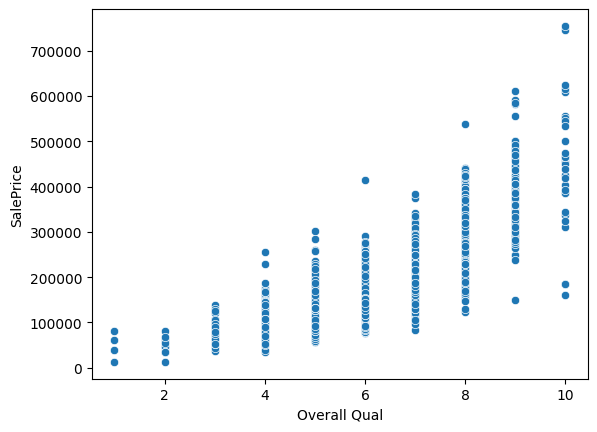

In [99]:
sns.scatterplot(data= df1, x= 'Overall Qual', y= 'SalePrice')

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

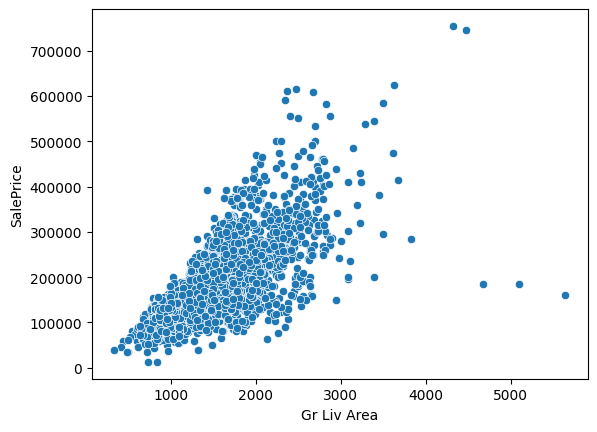

In [100]:
sns.scatterplot(data= df1, x= 'Gr Liv Area', y= 'SalePrice')

In [101]:
df[(df['Gr Liv Area'] > 4000) & (df['SalePrice']<300000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [103]:
drop_index = df[(df['Gr Liv Area'] > 4000) & (df['SalePrice']<300000)].index

In [107]:
df = df.drop(drop_index, axis=0)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

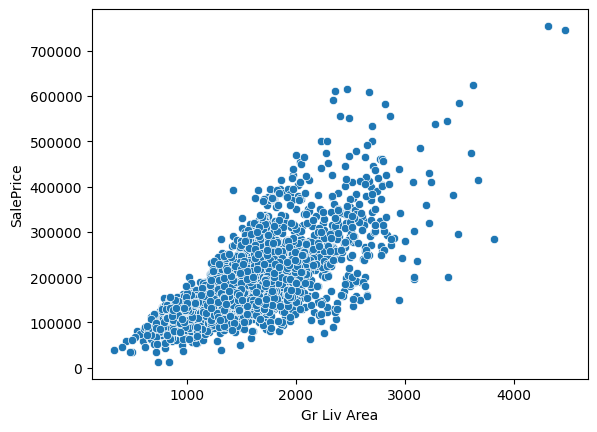

In [108]:
sns.scatterplot(data= df, x= 'Gr Liv Area', y= 'SalePrice')

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

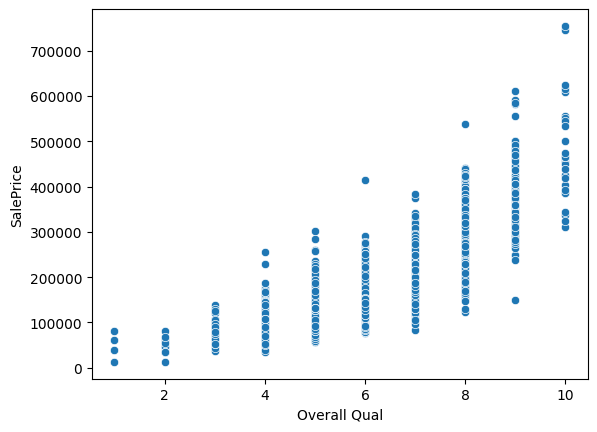

In [109]:
sns.scatterplot(data= df, x= 'Overall Qual', y= 'SalePrice')

In [110]:
df.to_csv('Ames_Housing_data_outlier_removal.csv')

In [111]:
df[(df['Gr Liv Area'] > 4000) & (df['SalePrice']<300000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [112]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [113]:
with open('Ames_Housing_Feature_Description.txt', 'r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [114]:
df = pd.read_csv('Ames_outliers_removed.csv')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [116]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [117]:
df = df.drop('PID', axis=1)

In [118]:
len(df.columns)

80

In [122]:
100 * df.isnull().sum() / len(df)

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [121]:
len(df)

2927

In [129]:
def percent_nan(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()

    return percent_nan

In [130]:
percent_nan = percent_nan(df)

In [131]:
percent_nan

Electrical         0.034165
Garage Cars        0.034165
BsmtFin SF 1       0.034165
Garage Area        0.034165
BsmtFin SF 2       0.034165
Bsmt Unf SF        0.034165
Total Bsmt SF      0.034165
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
Mas Vnr Area       0.785787
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 1     2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Garage Finish      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Mas Vnr Type      60.642296
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

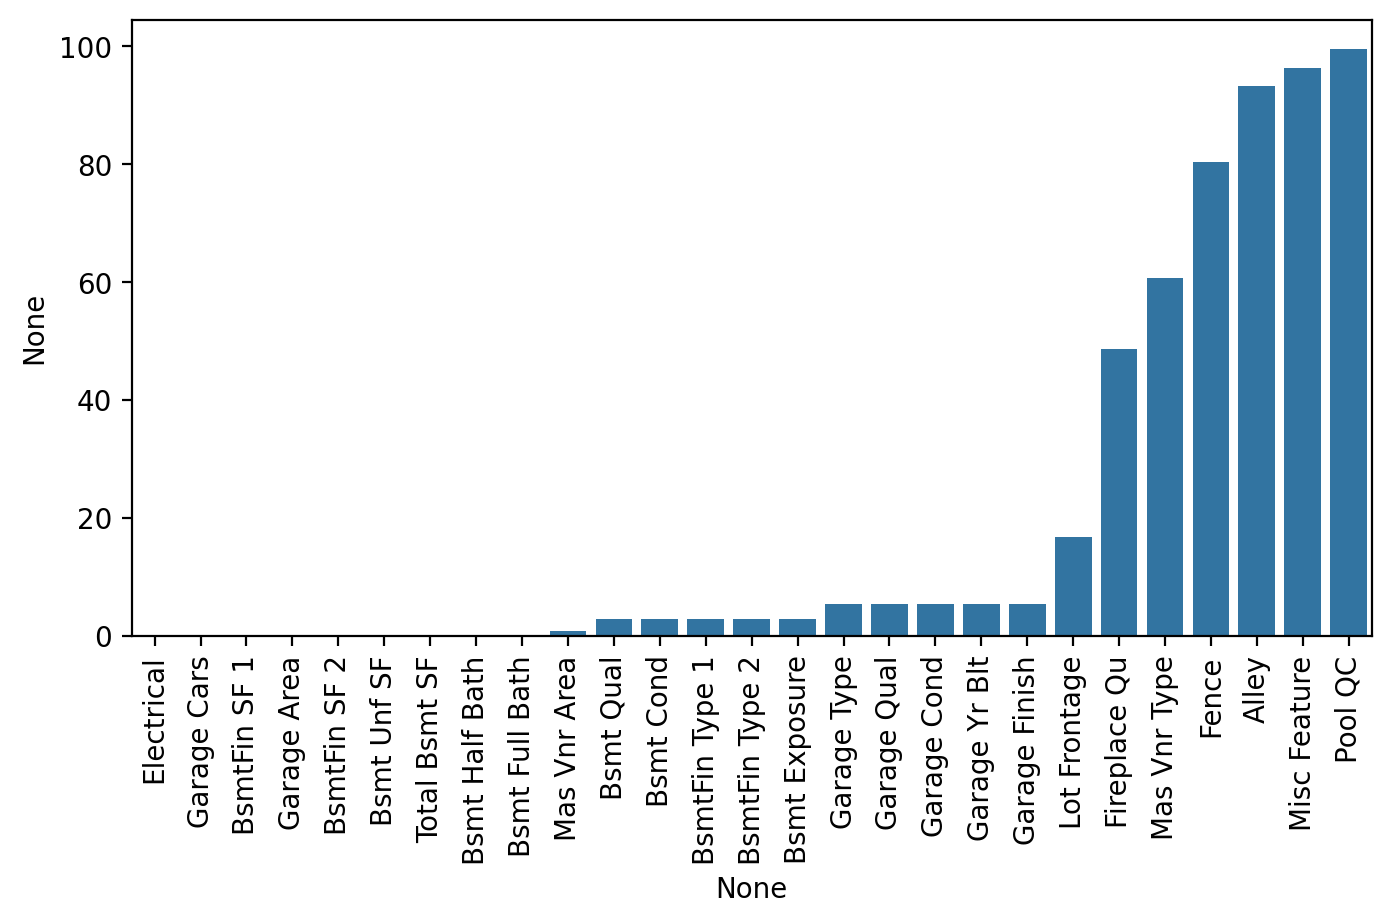

In [135]:
plt.figure(figsize=(8,4), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

(0.0, 1.0)

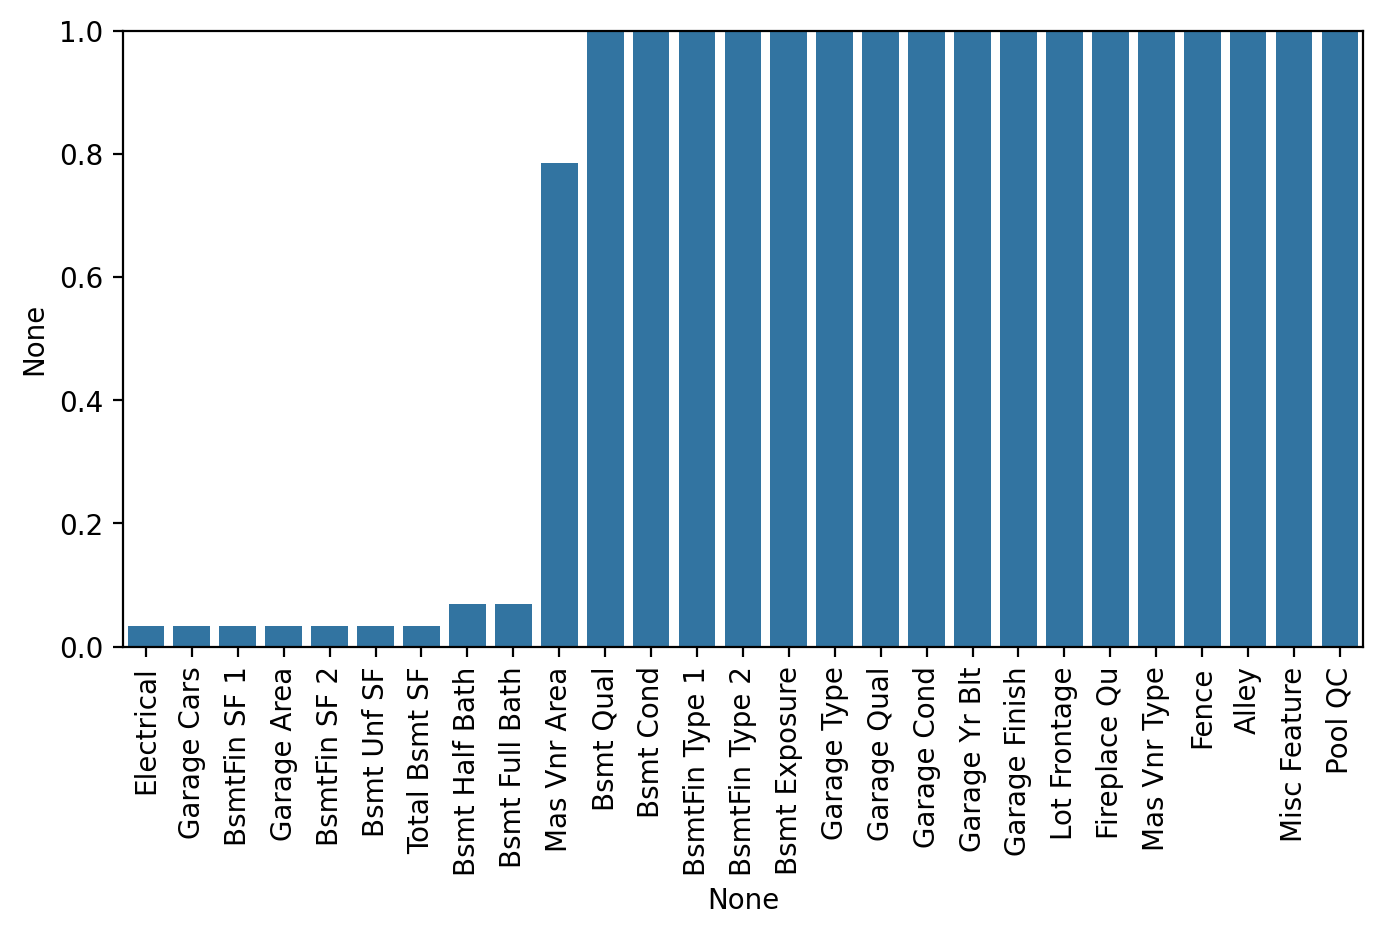

In [136]:
plt.figure(figsize=(8,4), dpi=200)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

In [137]:
percent_nan = percent_nan[percent_nan<1].sort_values()

In [138]:
percent_nan

Electrical        0.034165
Garage Cars       0.034165
BsmtFin SF 1      0.034165
Garage Area       0.034165
BsmtFin SF 2      0.034165
Bsmt Unf SF       0.034165
Total Bsmt SF     0.034165
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
Mas Vnr Area      0.785787
dtype: float64

In [139]:
df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1576,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [140]:
df[df['Garage Cars'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2233,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


In [142]:
df = df.dropna(subset=['Electrical','Garage Cars'], axis=0)

In [145]:
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()

    return percent_nan

In [146]:
percent_nan = percent_missing(df)

In [147]:
percent_nan = percent_nan[percent_nan<1].sort_values()

In [148]:
percent_nan

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Area      0.786325
dtype: float64